## Assignment-05-Multiple Linear Regression

### Question 2 (Toyota_Corolla)

### importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

### import dataset

In [4]:
data1=pd.read_csv("D:\\EXCELR\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENT\\Multi Linear Regression\\ToyotaCorolla.csv",encoding='unicode_escape')
data1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
data2=data1[['Price','Age_08_04','KM',"HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
data2.shape

(1436, 9)

In [7]:
data2.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [10]:
data2.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [11]:
data2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
data2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


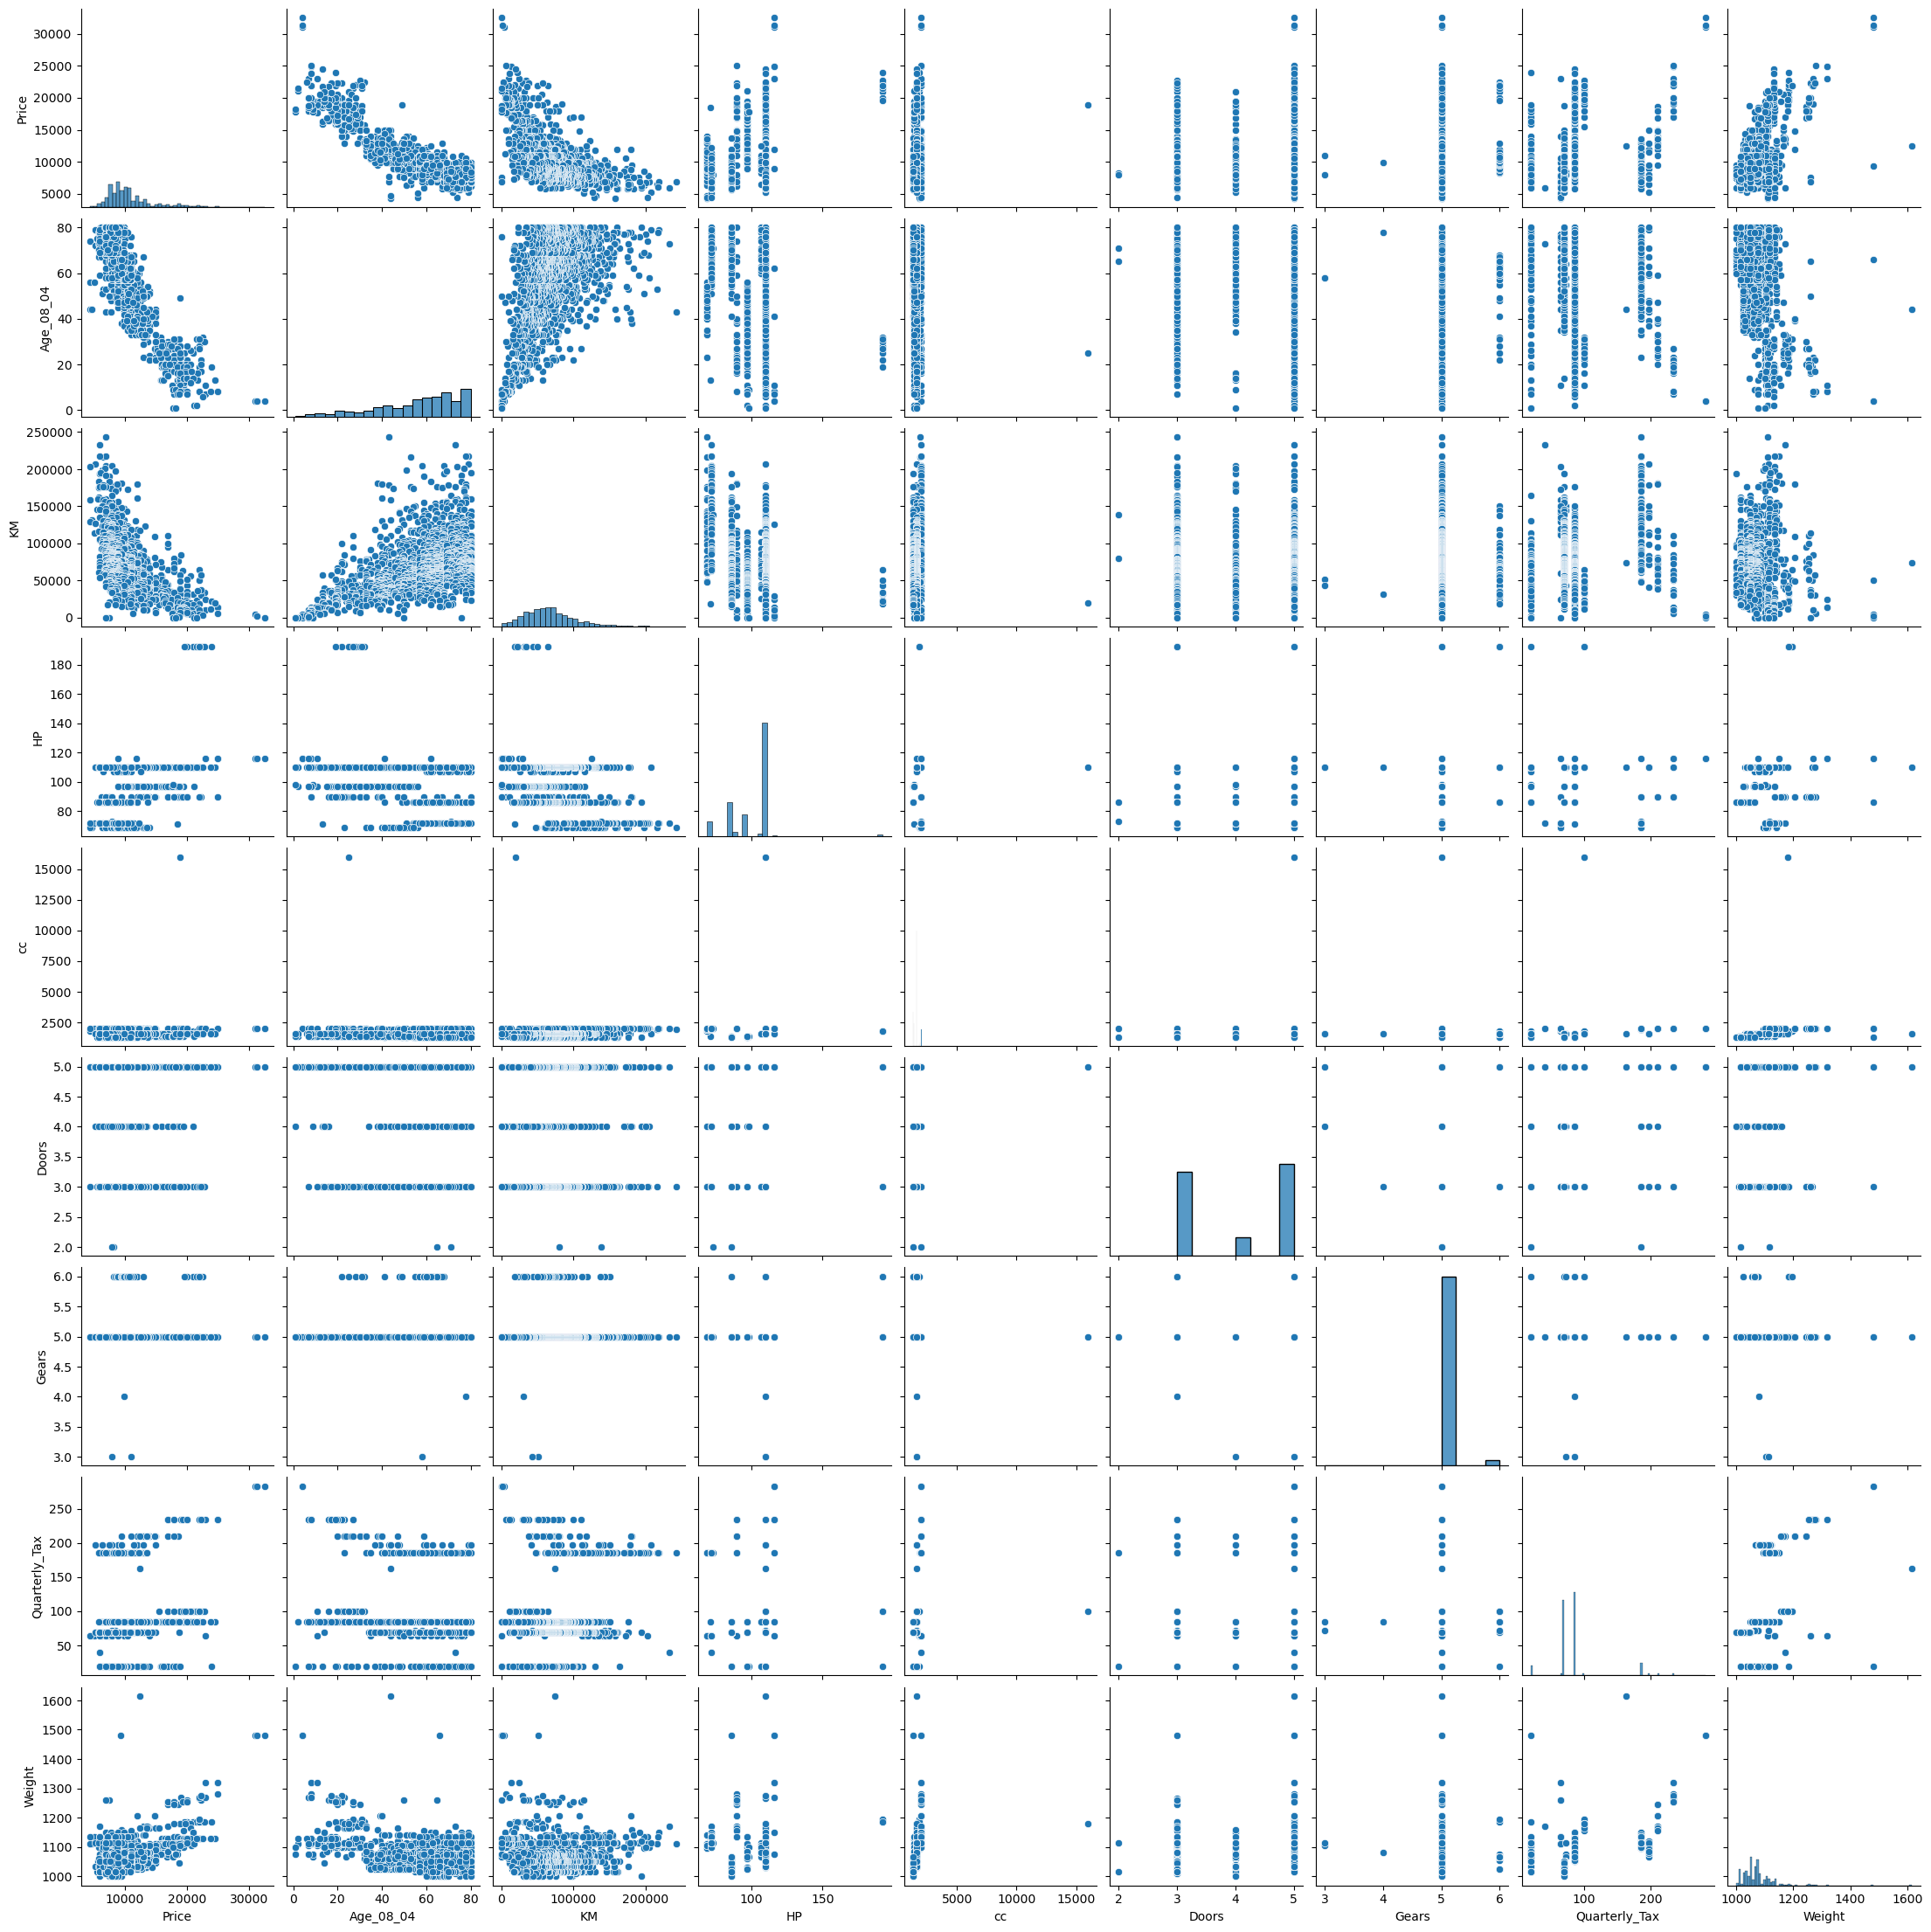

In [13]:
sns.pairplot(data2)

In [14]:
model1=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data2).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:17:49   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model1.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

### Calculating VIF Values

In [17]:
rsq_age=smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data2).fit().rsquared
vif_age=1/(1-rsq_age)           

In [18]:
rsq_KM=smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data2).fit().rsquared
vif_KM=1/(1-rsq_KM) 

In [19]:
rsq_HP=smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=data2).fit().rsquared
vif_HP=1/(1-rsq_HP)

In [20]:
rsq_cc=smf.ols("cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight",data=data2).fit().rsquared
vif_cc=1/(1-rsq_cc) 

In [21]:
rsq_Doors=smf.ols("Doors~Age_08_04+HP+cc+KM+Gears+Quarterly_Tax+Weight",data=data2).fit().rsquared
vif_Doors=1/(1-rsq_Doors) 

In [22]:
rsq_Gears=smf.ols("Gears~Age_08_04+HP+cc+Doors+KM+Quarterly_Tax+Weight",data=data2).fit().rsquared
vif_Gears=1/(1-rsq_Gears) 

In [23]:
rsq_Tax=smf.ols("Quarterly_Tax~Age_08_04+HP+cc+Doors+Gears+KM+Weight",data=data2).fit().rsquared
vif_Tax=1/(1-rsq_Tax) 

In [24]:
rsq_Weight=smf.ols("Weight~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+KM",data=data2).fit().rsquared
vif_Weight=1/(1-rsq_Weight) 

In [25]:
d1={'variables':['Age','KM','HP','cc','Doors','Gears','Tax','Weight'],
    'Vif values':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Tax,vif_Weight]}
vif_data=pd.DataFrame(d1)
vif_data

,variables,Vif values
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Tax,2.311431
7,Weight,2.516420


### Residual Plot

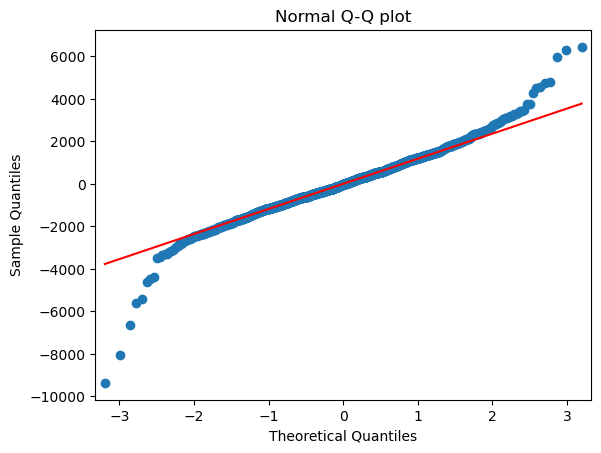

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot")
plt.show()

In [27]:
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [28]:
list(np.where(model1.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [29]:
def get_standardized_values(val):
    return ((val-val.mean())/val.std())

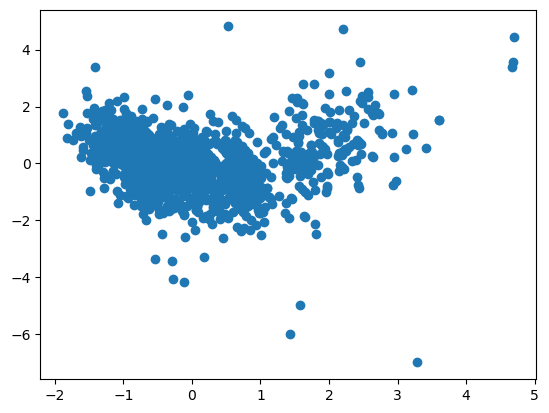

In [30]:
plt.scatter(get_standardized_values(model1.fittedvalues),
           get_standardized_values(model1.resid))

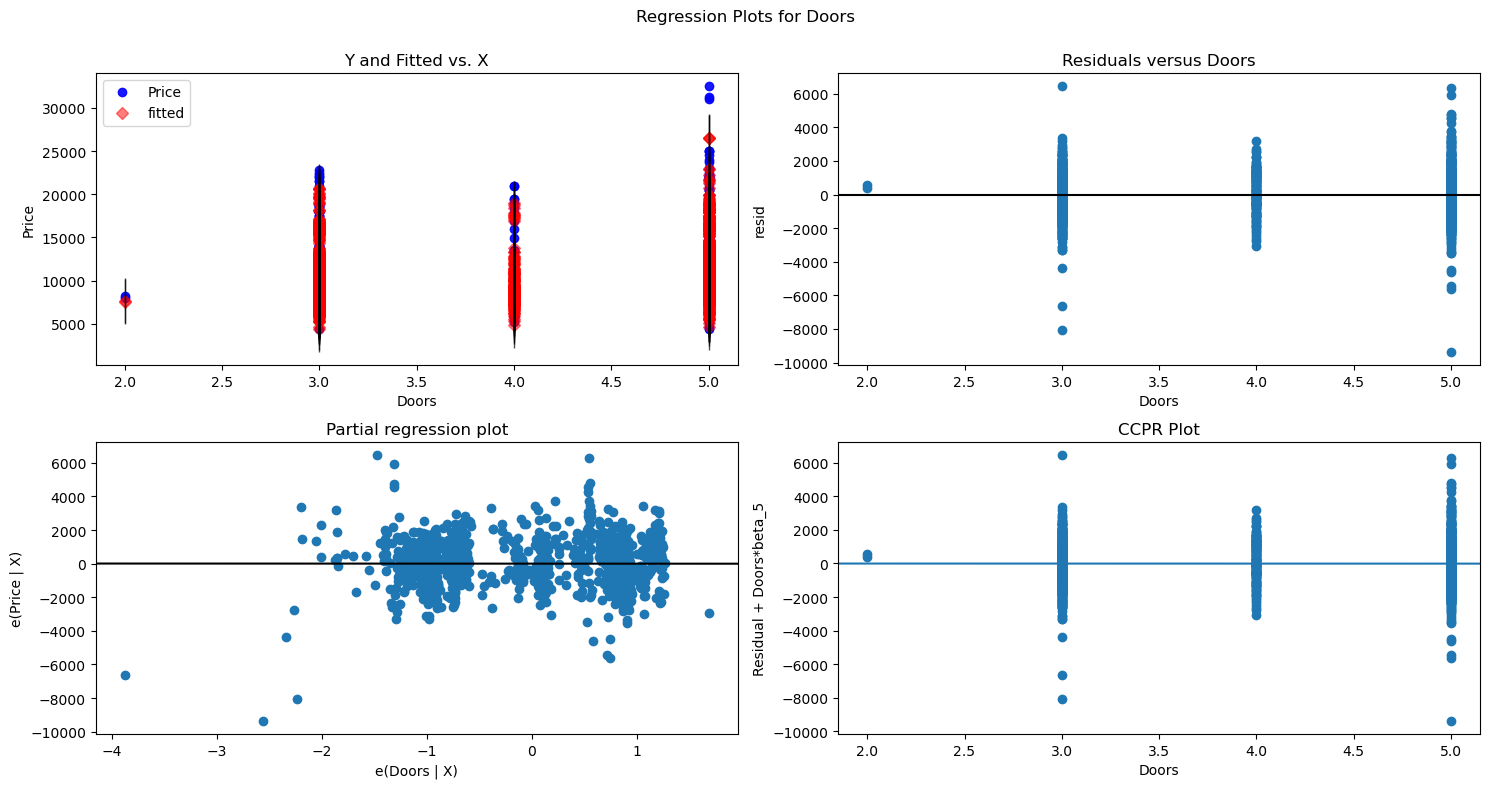

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Doors",fig=fig)
plt.show()

In [32]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

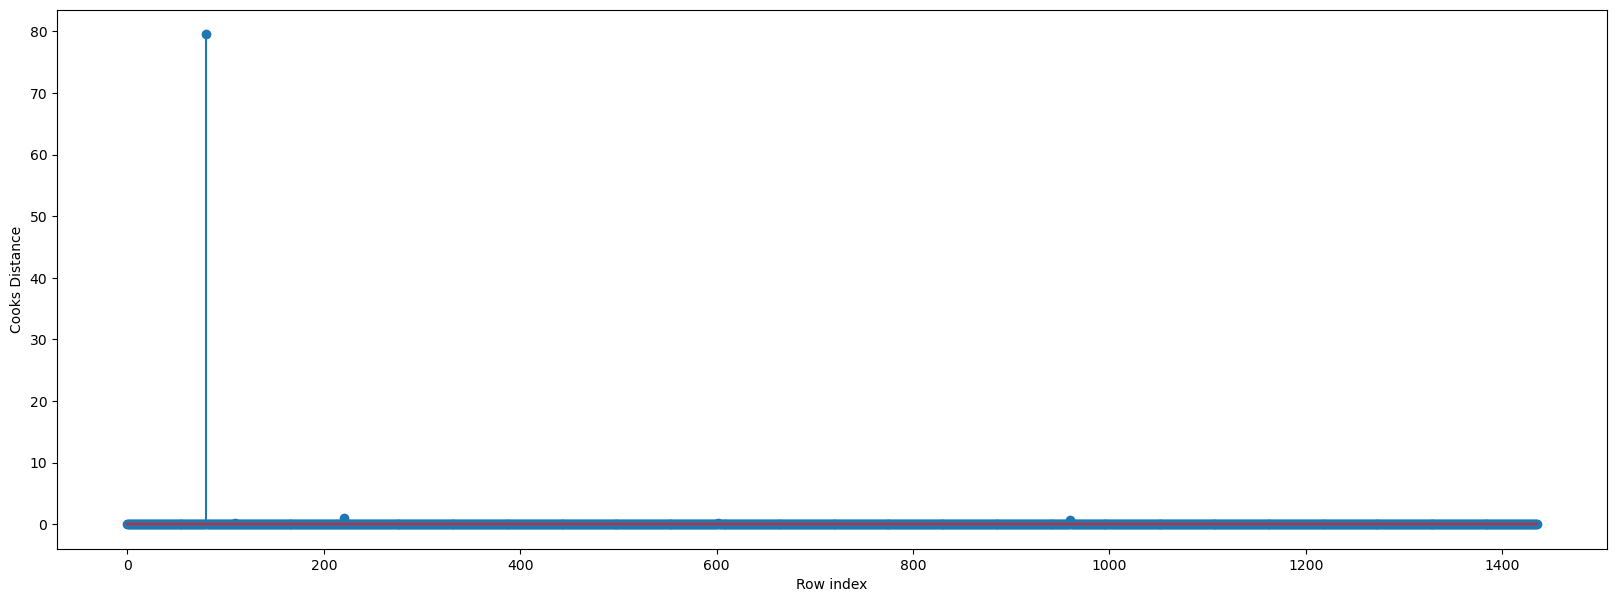

In [33]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
(np.argmax(c),np.max(c))

(80, 79.52010624143118)

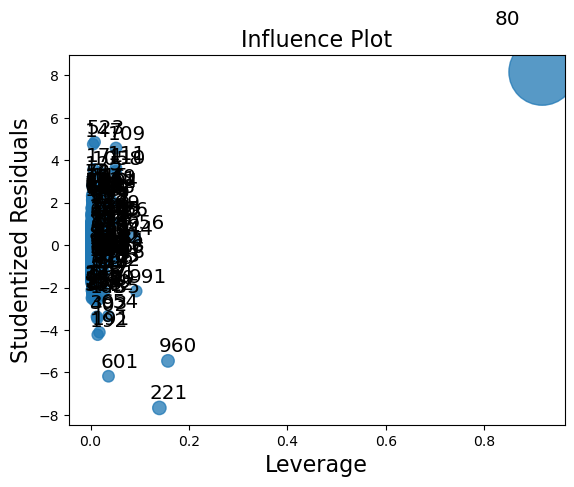

In [35]:
influence_plot(model1)
plt.show()

In [36]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

### from the above plots, data point 80 is found influencer.

In [38]:
data3=data2.drop(data2.index[80],axis=0).reset_index()
data3.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [39]:
data3=data3.drop(['index'],axis=1)

In [40]:
model2=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data3).fit()
(model2.rsquared,model2.rsquared_adj)

(0.8693790488655818, 0.8686462525057814)

In [41]:
model3=smf.ols("Price~Age_08_04+KM+HP+Gears+cc+Quarterly_Tax+Weight",data=data3).fit()
(model3.rsquared,model3.rsquared_adj)

(0.8693349475698541, 0.8686939837527475)

In [42]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

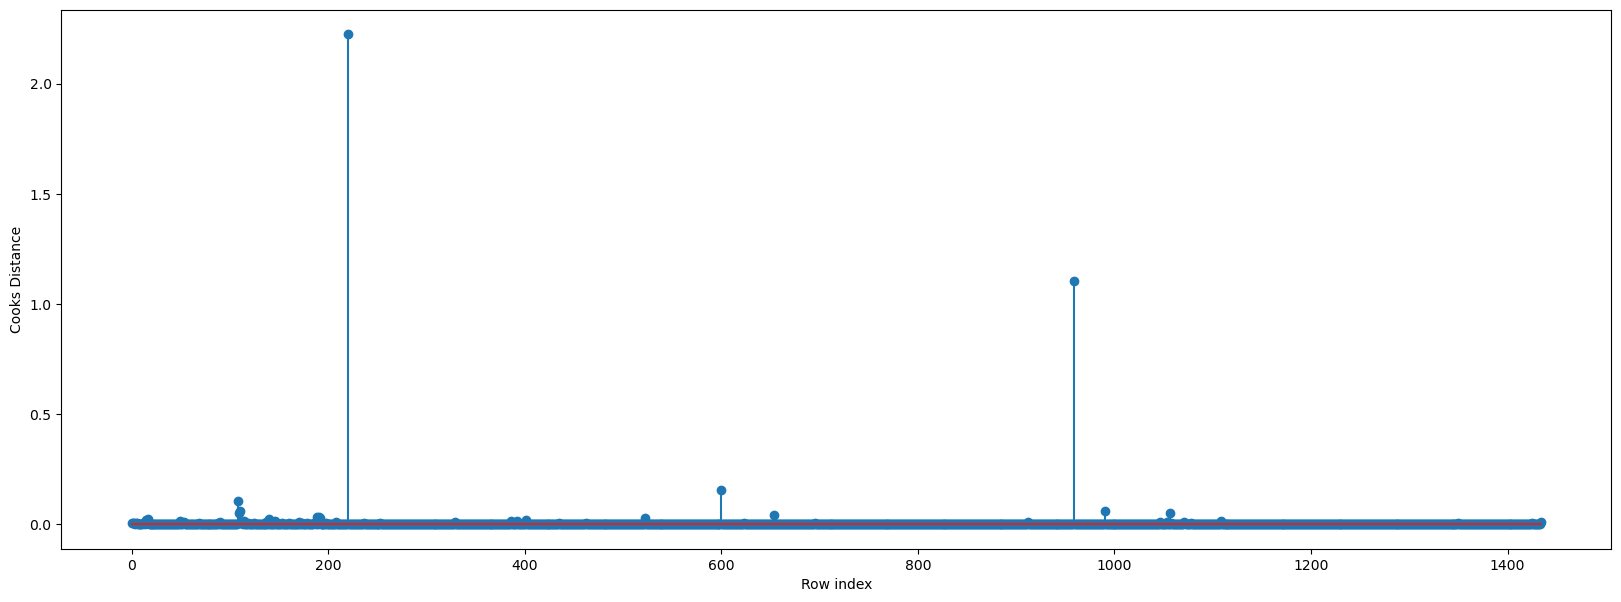

In [43]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
(np.argmax(c),np.max(c))

(220, 2.2244611713011246)

In [45]:
data4=data3.drop(data3.index[220],axis=0).reset_index()

In [46]:
model4=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data4).fit()
(model4.rsquared,model4.rsquared_adj)

(0.877844587859978, 0.8771588030900691)

In [47]:
model4_influence = model4.get_influence()
(c, _) = model4_influence.cooks_distance

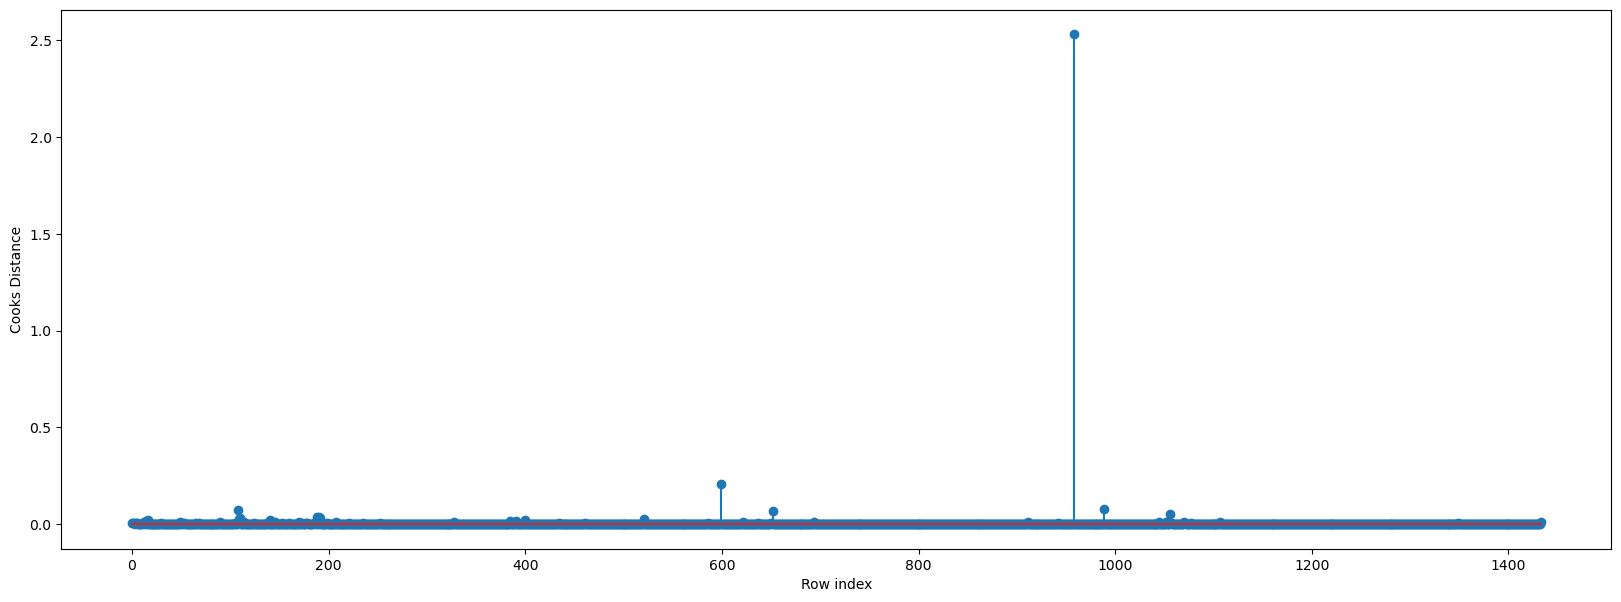

In [48]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
(np.argmax(c),np.max(c))

(958, 2.531256693023371)

In [50]:
data4[data4.index.isin([958])]

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
958,959,9390,66,50806,86,1300,3,5,19,1480


In [51]:
data5=data4.drop(data4.index[958],axis=0).reset_index()

In [52]:
model5=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data5).fit()
(model5.rsquared,model5.rsquared_adj)

(0.8851845904421738, 0.8845395600513994)

In [53]:
model5_influence = model5.get_influence()
(c, _) = model5_influence.cooks_distance

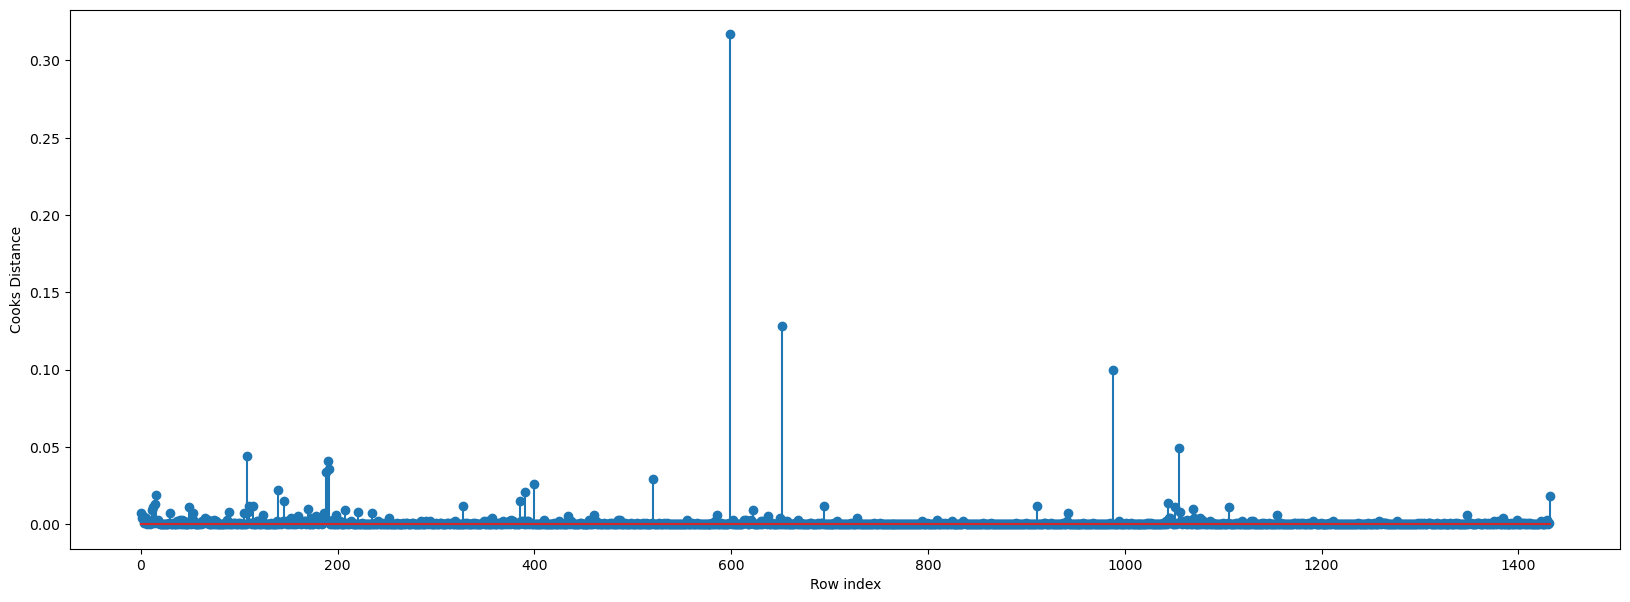

In [54]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
model5.predict(data1.iloc[0:10,])

0    16333.273814
1    15892.326850
2    16310.886081
3    15979.990390
4    15846.536733
5    15240.191494
6    17527.146348
7    17509.224576
8    20881.291978
9    13564.937692
dtype: float64

In [56]:
data2.head(10)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [57]:
new_val=pd.DataFrame({'Age_08_04':20,'KM':40000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Quarterly_Tax':220,'Weight':1200},index=[1])

In [58]:
model5.predict(new_val)

1    17912.557455
dtype: float64

In [59]:
d3 = {"Model No.":pd.Series(["model1","model2","model3","model4","model5"]),
    "Rsquare":pd.Series([model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared]),
     "AIC Values":pd.Series([model1.aic,model2.aic,model3.aic,model4.aic,model5.aic])}
table=pd.DataFrame(d3)
table

,Model No.,Rsquare,AIC Values
0,model1,0.863763,24769.076640
1,model2,0.869379,24687.281024
2,model3,0.869335,24685.765439
3,model4,0.877845,24574.776616
4,model5,0.885185,24469.715205
